## Gaussian Mixture Models

Qualitatively reproduce Figure 9.5 in *Pattern Recognition and Machine Learning*. That is, generate a 3-panel plot to visualize samples from the a) joint distribution and b) marginal distributions of a 3-component, 2D gaussian mixture model, as well as c) the "responsibility" of each component $k$ in explaining each sample drawn.

You may use `scipy.stats.multivariate_normal` to define the PDF and draw samples from individual components. Assume the following parameters for the GMM:

In [1]:
from IPython.display import display, Math

# LaTeX expression
latex_code = r"""
\begin{align}
\mu_1 &= (0.5,0.5), \quad \Sigma_1 = \begin{bmatrix} 0.02 & -0.01 \\ -0.01 & 0.02 \end{bmatrix} \\
\mu_2 &= (0.8,0.6), \quad \Sigma_2 = \begin{bmatrix} 0.02 & 0.01 \\ 0.01 & 0.02 \end{bmatrix} \\
\mu_3 &= (0.1,0.4), \quad \Sigma_3 = \begin{bmatrix} 0.02 & 0.01 \\ 0.01 & 0.02 \end{bmatrix}
\end{align}
"""

# Display LaTeX
display(Math(latex_code))


<IPython.core.display.Math object>

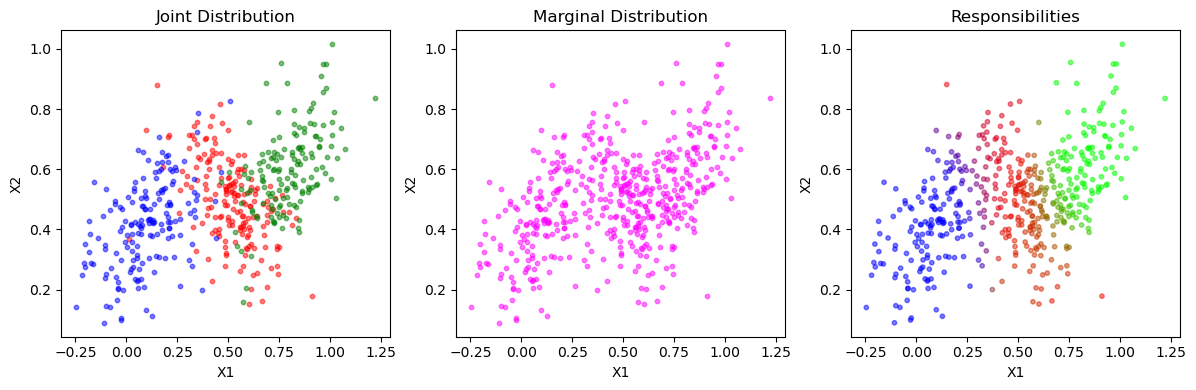

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for each Gaussian component
mu1 = np.array([0.5, 0.5])
covariance1 = np.array([[0.02, -0.01], [-0.01, 0.02]])

mu2 = np.array([0.8, 0.6])
covariance2 = np.array([[0.02, 0.01], [0.01, 0.02]])

mu3 = np.array([0.1, 0.4])
covariance3 = np.array([[0.02, 0.01], [0.01, 0.02]])

# Mixture weights
weights = np.array([1/3, 1/3, 1/3])

# Define the multivariate normal distributions
gmm_components = [
    multivariate_normal(mean=mu1, cov=covariance1),
    multivariate_normal(mean=mu2, cov=covariance2),
    multivariate_normal(mean=mu3, cov=covariance3)
]

# Generate samples
num_samples = 500
samples = []
component_labels = []
for _ in range(num_samples):
    component = np.random.choice(len(gmm_components), p=weights)
    sample = gmm_components[component].rvs()
    samples.append(sample)
    component_labels.append(component)
samples = np.array(samples)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Joint Distribution of the samples
colors = ['red', 'green', 'blue']
for i in range(len(gmm_components)):
    component_samples = samples[np.array(component_labels) == i]
    axs[0].scatter(component_samples[:, 0], component_samples[:, 1], c=colors[i], s=10, alpha=0.5, label=f'Component {i+1}')
axs[0].set_title('Joint Distribution')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

# Marginal Distribution
axs[1].scatter(samples[:, 0], samples[:, 1], color='magenta', s=10, alpha=0.5)
axs[1].set_title('Marginal Distribution')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

# Responsibilities of each component
responsibilities = np.array([weights[i] * gmm_component.pdf(samples) for i, gmm_component in enumerate(gmm_components)])
responsibilities /= responsibilities.sum(axis=0)

# Convert responsibilities to RGB colors
responsibility_colors = np.dot(responsibilities.T, np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))
axs[2].scatter(samples[:, 0], samples[:, 1], color=responsibility_colors, s=10, alpha=0.5)
axs[2].set_title('Responsibilities')
axs[2].set_xlabel('X1')
axs[2].set_ylabel('X2')

plt.tight_layout()
plt.show()